In [1]:
import matplotlib.pyplot as plt
from decimal import Decimal
import numpy as np

In [2]:
from experiment.scenario import *
from experiment_setup.exp_utrecht_10_492_594_setup import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Setup

Check scenario settings:

In [3]:
# for i, ss in enumerate(scenario_settings):
#     print(str(i) + ": " + str(ss))

Set up experiment:

In [4]:
load_existing_experiment = True

if not load_existing_experiment:
    e = Experiment(experiment_name, experiment_dirpath, default_config, scenario_settings, scene_parts)

    print("\nSetting up experiment:")
    e.setup()
else:
    print("\nLoading existing experiment:")
    e = Experiment.load(experiment_dirpath / experiment_name, load_scenarios=True)


Loading existing experiment:

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...


# Compare uni- to bidirectional Hausdorff

In [8]:
eo = Experiment.load(e[22].recon_optim_output_dirpath, load_scenarios=True)


Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...


In [9]:
eo.run_steps(Scenario.setup_evaluation, lods=["2.2"])


Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.031002.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.022007.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.018523.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.025999.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.022000.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.023010.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.019521.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.024004.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after

In [10]:
eo.run_steps(Scenario.run_evaluation, evaluator_selection="hausdorff_bi")


Running 'run_evaluation' for optim_0000 ...

Starting HausdorffLODSEvaluator ...

Setting up a HausdorffEvaluator for each LOD ...

Running HausdorffEvaluator for LOD '22' ...

Splitting OBJ files into one file per individual object ...

Identifying individual OBJ files present in both input datasets ...
- Directories:
  Input 1: C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\01_input\OBJ\10-492-594_LOD22_mat_python
  Input 2: C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594\06_reconstruction_optimization\scenario_022\07_reconstruction\optim_0000\output\model_lod22
- File comparison: Found 1084 unique OBJ file names in total, of which
  99 file names present both directories
  985 file names present only in directory 1
  0 file names present only in directory 2
Computing Hausdorff distances between split OBJ files ...

Joining results ...

Finished HausdorffLODSEvaluator after 0:00:05.932710.

Finished 'run_evaluation' for optim_0000 after 0:00:05.951712.



In [11]:
eo.compute_summary_statistics(evaluator_selection=["complexity", "complexity_diff", "hausdorff", "hausdorff_bi", "geoflow_output"])


Computing summary statistics of 51 scenarios ...


## Across all scenarios of the optimization experiment

<Axes: xlabel='hausdorff_22_mean', ylabel='hausdorff_bi_22_mean'>

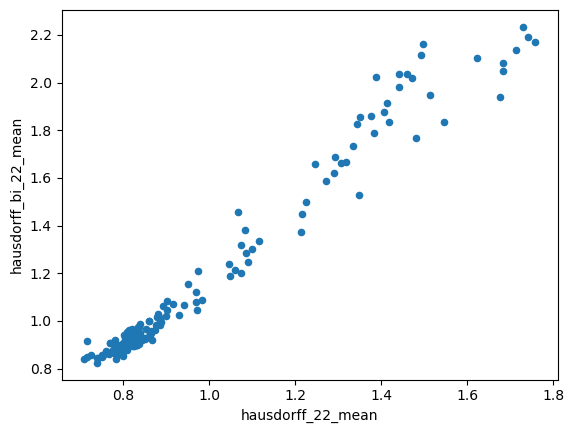

In [19]:
eo.summary_stats.plot.scatter("hausdorff_22_mean", "hausdorff_bi_22_mean")

<Axes: xlabel='rms_min_dist_22_mean', ylabel='rms_min_dist_bi_22_mean'>

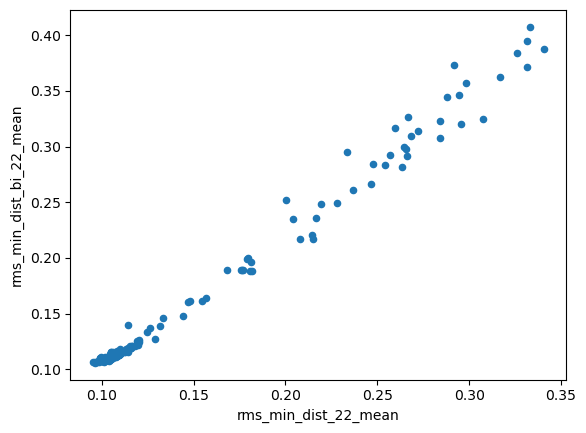

In [18]:
eo.summary_stats.plot.scatter("rms_min_dist_22_mean", "rms_min_dist_bi_22_mean")

## For a single optimization scenario

In [34]:
sid = 100

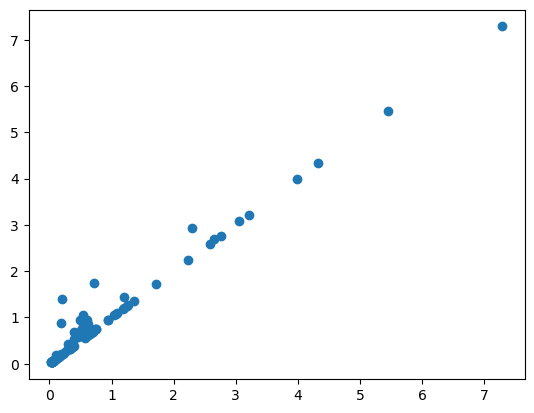

In [35]:
plt.scatter(eo[sid].evaluators["hausdorff"].results["hausdorff_22"], eo[sid].evaluators["hausdorff_bi"].results["hausdorff_bi_22"])

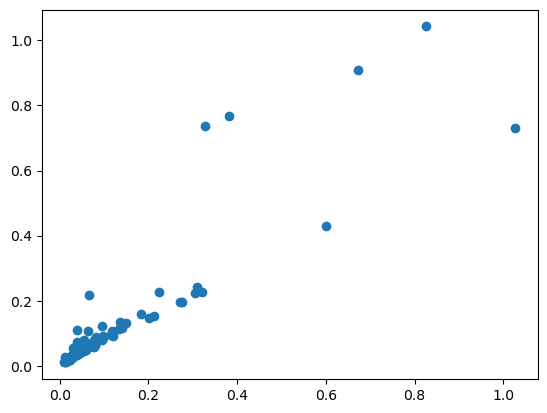

In [36]:
plt.scatter(eo[sid].evaluators["hausdorff"].results["rms_min_dist_22"], eo[sid].evaluators["hausdorff_bi"].results["rms_min_dist_bi_22"])